In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from pathlib import Path
import os
from tqdm.auto import tqdm
from PIL import Image
import PIL
import cv2
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import requests
from torchinfo import summary
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from typing import List, Tuple
import random

C:\Users\Andrey\AppData\Local\Temp\ipykernel_11132\3838535988.py:8: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



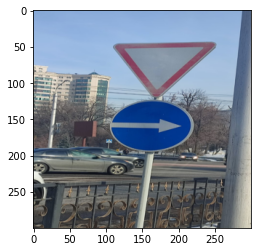

In [12]:
transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
])

image = transform(Image.open('sign.jpeg'))

plt.imshow(torch.tensor(image).permute(1, 2, 0));

In [123]:
data, labels = [], []
classes = 43 
cur_path = os.getcwd()



transform = transforms.Compose([
    transforms.Resize((30, 30)),
    transforms.ToTensor(),
])

for i in range(classes): 
    path = os.path.join(cur_path,'Train', str(i)) 
    images = os.listdir(path) 
    for a in images:
        image = transform(Image.open(os.path.join(path, a)))  
        data.append(image) 
        labels.append(i) 
        
data = np.array(data)
labels = np.array(labels)

data.shape, labels.shape

((39209, 3, 30, 30), (39209,))

In [159]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [125]:
list_set = set(labels)
unique_list = (list(list_set))

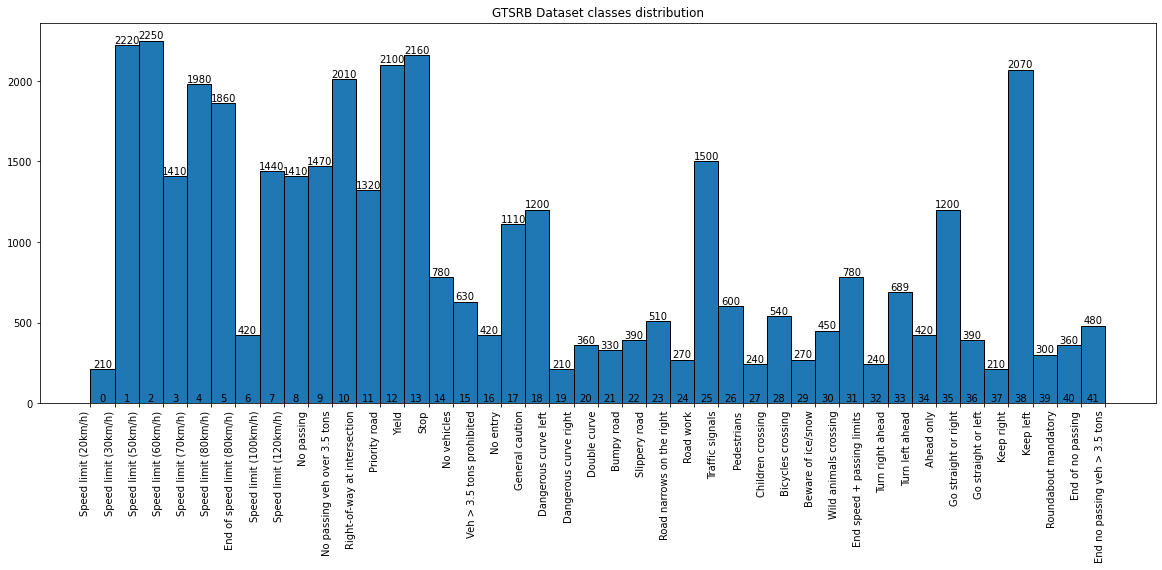

In [128]:
fig, ax = plt.subplots(figsize =(20, 7))
counts, edges, bars = ax.hist(labels, bins = unique_list,edgecolor='black')


ax.set_title("GTSRB Dataset classes distribution") 


ax.set_xticks(unique_list)
ax.set_xticklabels([classes[label] for label in unique_list], rotation=90, ha='right')

rects = ax.patches
label = unique_list

for rect, label in zip(rects, label):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, 0, label,
            ha='center', va='bottom')
ax.bar_label(bars)

plt.show()

In [155]:
train_df = pd.read_csv('Train.csv')
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


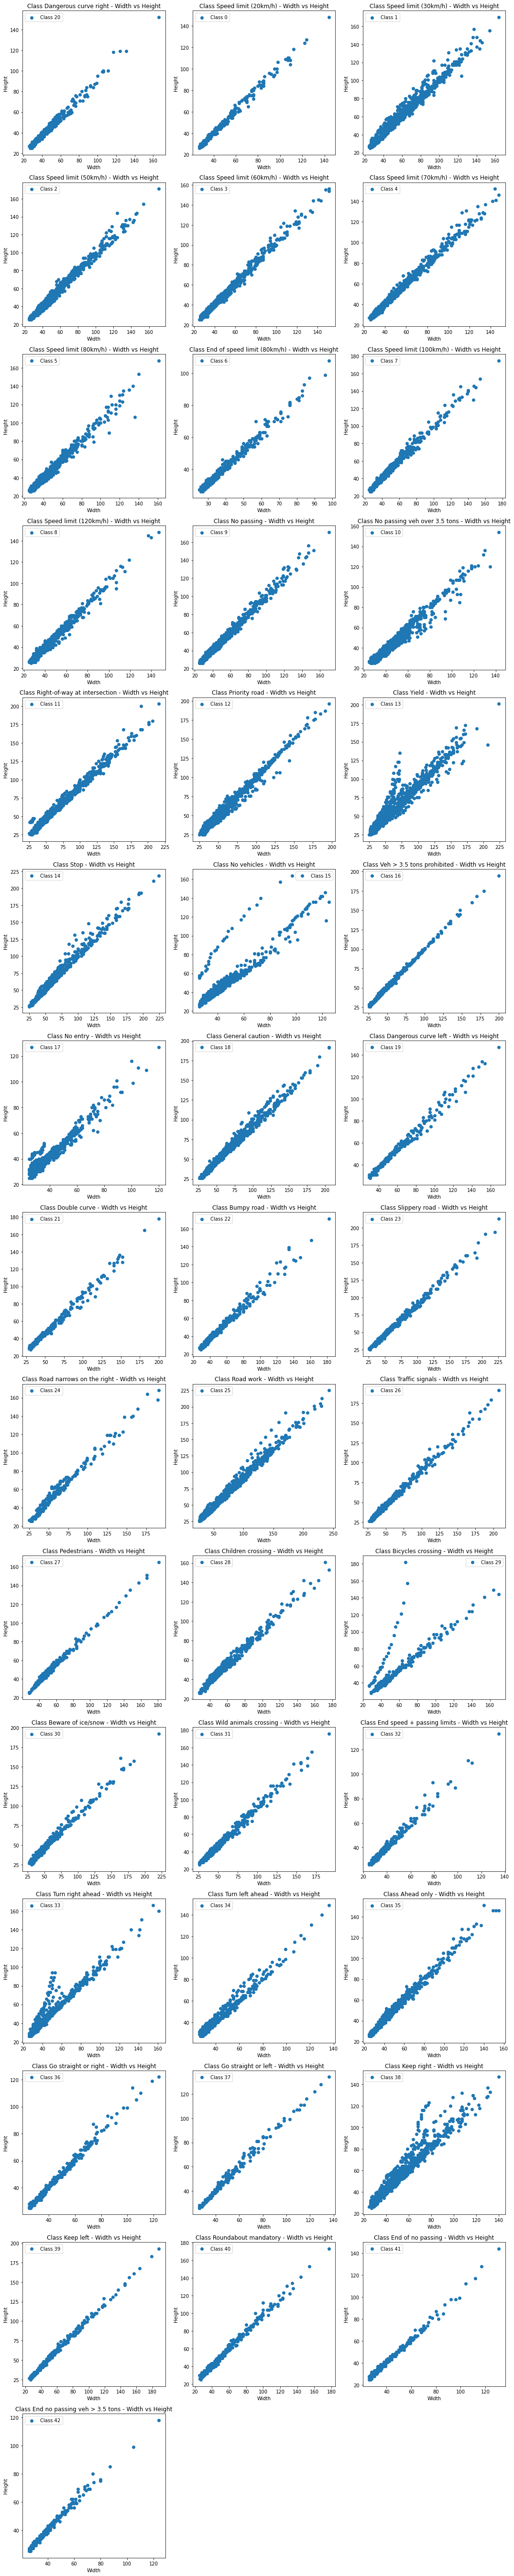

In [161]:
classes_a = train_df['ClassId'].unique()

num_columns = 3

num_rows = (len(classes) + num_columns - 1) // num_columns

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5 * num_rows))

for i, class_label in enumerate(classes_a):
    class_data = train_df[train_df['ClassId'] == class_label]
    
    row_index, col_index = divmod(i, num_columns)
    
    axs[row_index, col_index].scatter(class_data['Width'], class_data['Height'], label=f'Class {class_label}')
    axs[row_index, col_index].set_title(f'Class {classes[class_label]} - Width vs Height')
    axs[row_index, col_index].set_xlabel('Width')
    axs[row_index, col_index].set_ylabel('Height')
    axs[row_index, col_index].legend()

for i in range(len(classes), num_rows * num_columns):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

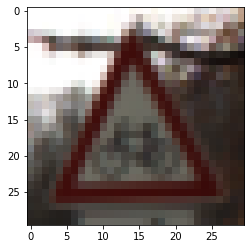

In [174]:
plt.imshow(torch.tensor(data[23400]).permute(1, 2, 0));
plt.imshow(torch.tensor(data[31617]).permute(1, 2, 0));

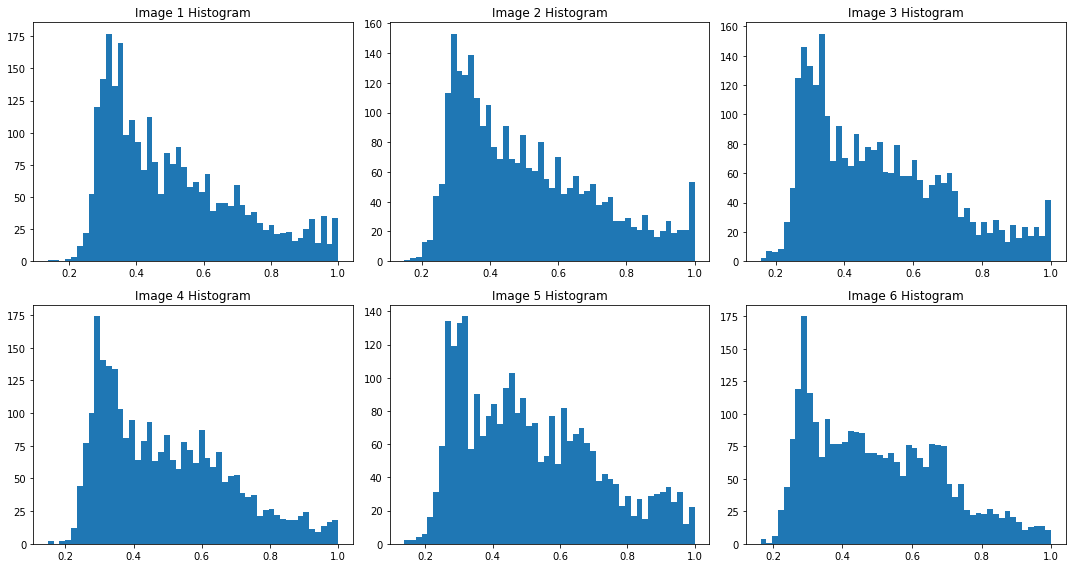

In [156]:
num_images_to_plot = 6
num_rows = 2
num_columns = 3

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 8))

for i in range(num_images_to_plot):
    row_index, col_index = divmod(i, num_columns)

    axs[row_index, col_index].hist(data[i].ravel(), bins=50)
    axs[row_index, col_index].set_title(f"Image {i + 1} Histogram")

plt.tight_layout()
plt.show()

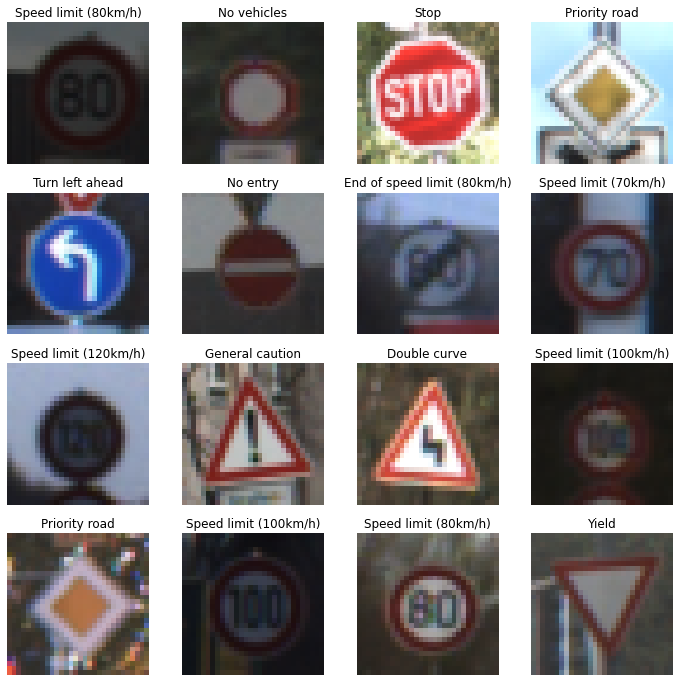

In [7]:
torch.manual_seed(42)
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i in range(4):
    for j in range(4):
        random_idx = torch.randint(0, len(data), size=[1]).item()
        axes[i, j].imshow(torch.tensor(data[random_idx]).permute(1, 2, 0))
        axes[i, j].set_title(classes[labels[random_idx]])
        axes[i, j].axis('off')

plt.show()
    

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)
X_train = torch.from_numpy(X_train) 
y_train = torch.from_numpy(y_train).type(torch.LongTensor)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([27446, 3, 30, 30]),
 torch.Size([27446]),
 torch.Size([11763, 3, 30, 30]),
 torch.Size([11763]))

In [9]:
BATCH_SIZE = 32

train_ds = [(x,y) for x,y in zip(X_train, y_train)]
train_dataloader = DataLoader(train_ds,batch_size = BATCH_SIZE)

test_ds = [(x,y) for x,y in zip(X_test, y_test)]
test_dataloader = DataLoader(test_ds,batch_size = BATCH_SIZE)

print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 858 batches of 32
Length of test dataloader: 368 batches of 32


In [10]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 30, 30]), torch.Size([32]))

In [1]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [12]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(data_loader):

        y_pred = model(X)

    
        loss = loss_fn(y_pred, y)
        
        
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    
    return train_loss, train_acc
    

In [13]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    test_loss, test_acc = 0, 0
    model.eval()
    
    with torch.inference_mode(): 
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1)
            )
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
        
    
    return test_loss, test_acc

In [14]:
def plot_loss_curves(results):

    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))


    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

  
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

In [25]:
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn,):

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

In [29]:
class TSNET(nn.Module):
    def __init__(self, input_shape: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=16, 
                      kernel_size=(2, 2),
                      stride=(1,1),
                      padding= 'same'),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.MaxPool2d((2, 2))
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(16, 32, (2,2), (1, 1), padding='same'),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            nn.MaxPool2d((2, 2)))

        self.block_3 = nn.Sequential(
            nn.Conv2d(32, 64, (2,2), (1, 1), padding='same'),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.MaxPool2d((2, 2)))
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=576, 
                      out_features=43),
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.classifier(x)
        return x

torch.manual_seed(42)
model_0 = TSNET(input_shape=3,  
    output_shape=len(classes))

loss_fn_0 = nn.CrossEntropyLoss()
optimizer_0 = torch.optim.Adam(params=model_0.parameters(), 
                             lr=0.001)

model_0

TSNET(
  (block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1), padding=same)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=same)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=same)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.97260 | Train accuracy: 73.82%
Test loss: 0.31528 | Test accuracy: 91.97%

Epoch: 1
---------
Train loss: 0.19437 | Train accuracy: 94.12%
Test loss: 0.17198 | Test accuracy: 94.81%

Epoch: 2
---------
Train loss: 0.09765 | Train accuracy: 97.04%
Test loss: 0.08934 | Test accuracy: 97.32%

Epoch: 3
---------
Train loss: 0.07510 | Train accuracy: 97.63%
Test loss: 0.09998 | Test accuracy: 97.24%

Epoch: 4
---------
Train loss: 0.04847 | Train accuracy: 98.46%
Test loss: 0.08626 | Test accuracy: 97.68%



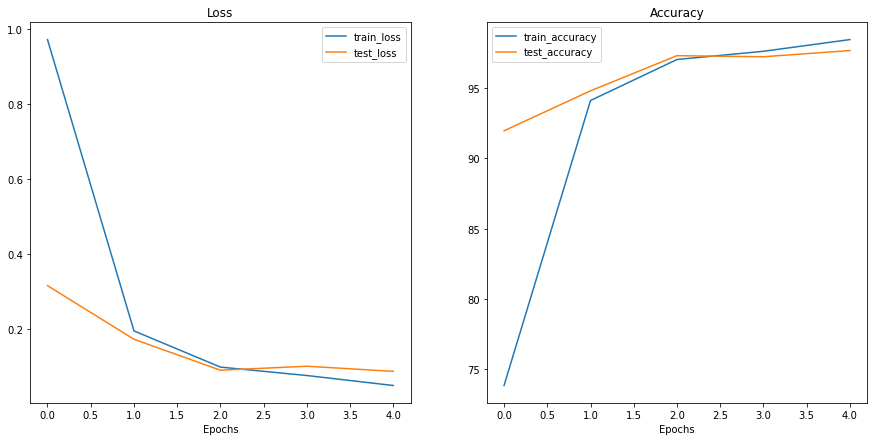

In [30]:
epochs = 5
results = {"train_loss": [], "test_loss": [], "train_acc": [], "test_acc": []}


for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_loss, train_acc = train_step(data_loader=train_dataloader, 
        model=model_0, 
        loss_fn=loss_fn_0,
        optimizer=optimizer_0,
        accuracy_fn=accuracy_fn,
    )    
    test_loss, test_acc= test_step(data_loader=test_dataloader,
        model=model_0,
        loss_fn=loss_fn_0,
        accuracy_fn=accuracy_fn,
    )
    results["train_loss"].append(train_loss.item())
    results["test_loss"].append(test_loss.item())
    results["train_acc"].append(train_acc)
    results["test_acc"].append(test_acc)
    
plot_loss_curves(results)


In [16]:
weights = torchvision.models.EfficientNet_B1_Weights.DEFAULT
model = torchvision.models.efficientnet_b1(weights=weights)

In [17]:
summary(model=model, 
        input_size=(32, 3, 30, 30),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 30, 30]      [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 30, 30]      [32, 1280, 1, 1]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 30, 30]      [32, 32, 15, 15]     --                   True
│    │    └─Conv2d (0)                                       [32, 3, 30, 30]      [32, 32, 15, 15]     864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 15, 15]     [32, 32, 15, 15]     64                   True
│    │    └─SiLU (2)                                         [32, 32, 15, 15]     [32, 32, 15, 15]     --                   --
│    └─Sequential (1)                                        [32, 32, 15, 15]     [32, 16, 15,

In [18]:
torch.manual_seed(42)
output_shape = len(classes)

model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape,
                    bias=True))

In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.18469 | Train accuracy: 63.76%
Test loss: 0.48646 | Test accuracy: 84.63%

Epoch: 1
---------
Train loss: 0.36132 | Train accuracy: 88.63%
Test loss: 0.14035 | Test accuracy: 95.41%

Epoch: 2
---------
Train loss: 0.12681 | Train accuracy: 96.22%
Test loss: 0.10367 | Test accuracy: 96.97%

Epoch: 3
---------
Train loss: 0.10380 | Train accuracy: 97.01%
Test loss: 0.10960 | Test accuracy: 96.85%

Epoch: 4
---------
Train loss: 0.10813 | Train accuracy: 97.10%
Test loss: 0.11615 | Test accuracy: 96.85%

Epoch: 5
---------
Train loss: 0.10145 | Train accuracy: 97.41%
Test loss: 0.11251 | Test accuracy: 97.56%

Epoch: 6
---------
Train loss: 0.08099 | Train accuracy: 98.00%
Test loss: 0.07323 | Test accuracy: 98.00%

Epoch: 7
---------
Train loss: 0.07399 | Train accuracy: 98.27%
Test loss: 0.04322 | Test accuracy: 98.94%

Epoch: 8
---------
Train loss: 0.06024 | Train accuracy: 98.61%
Test loss: 0.07494 | Test accuracy: 98.29%

Epoch: 9
---------
Train los

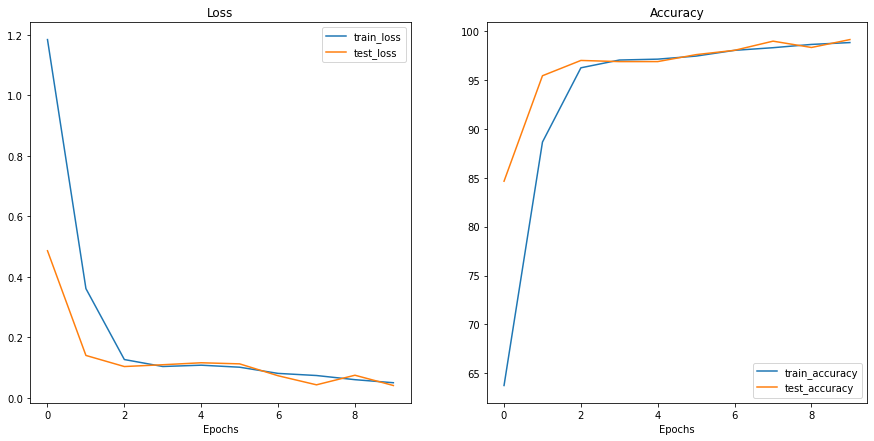

In [20]:
epochs = 10
results_0 = {"train_loss": [], "test_loss": [], "train_acc": [], "test_acc": []}

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_loss_0, train_acc_0 = train_step(data_loader=train_dataloader, 
        model=model, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
    )
    test_loss_0, test_acc_0 = test_step(data_loader=test_dataloader,
        model=model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
    )
    
    results_0["train_loss"].append(train_loss_0.item())
    results_0["test_loss"].append(test_loss_0.item())
    results_0["train_acc"].append(train_acc_0)
    results_0["test_acc"].append(test_acc_0)
    
plot_loss_curves(results_0)

In [24]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True 
)

MODEL_NAME = "EfficientNetTrafficSign"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH);

Saving model to: models\EfficientNetTrafficSign


In [31]:
model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn_0,
    accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'TSNET',
 'model_loss': 0.08625783026218414,
 'model_acc': 97.68172554347827}

In [32]:
model_results = eval_model(
    model=model,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_results

{'model_name': 'EfficientNet',
 'model_loss': 0.04097132384777069,
 'model_acc': 99.09986413043478}

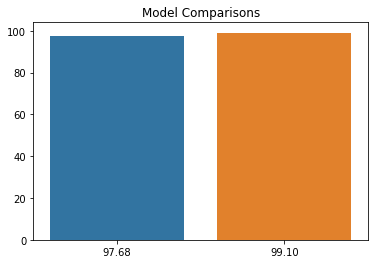

In [43]:
compare_results = pd.DataFrame([model_0_results, model_results])
sns.barplot(x=compare_results.model_name, y=compare_results.model_acc)
plt.gca().set_xticklabels([f"{97.68:.2f}", f"{99.10:.2f}"])
plt.title("Model Comparisons")
plt.show()

In [104]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str, 
                        class_names: List[str],
                        image_size: Tuple[int, int] = (30, 30),
                        transform: torchvision.transforms = None,
                        ):
    img = Image.open(os.path.join(cur_path, 'Test', image_path))
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
        ])
    
    model.eval()
    with torch.inference_mode():
      
      transformed_image = image_transform(img).unsqueeze(dim=0)

 
      target_image_pred = model(transformed_image)

    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {list(classes.values())[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

In [109]:
num_images_to_plot = 10
test_image_path_list = list(os.listdir(os.path.join(cur_path, 'Test')))
test_image_path_sample = random.sample(population=test_image_path_list, 
                                       k=num_images_to_plot)

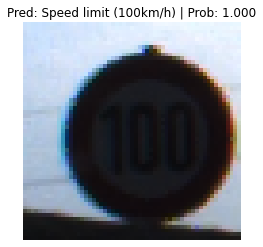

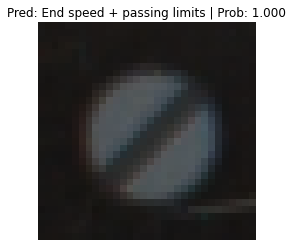

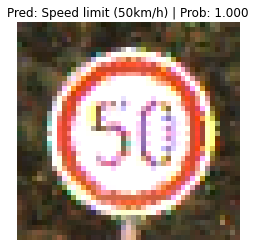

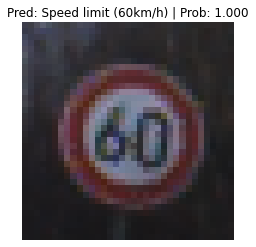

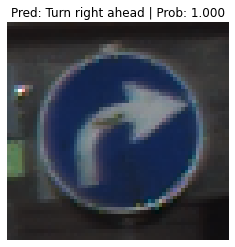

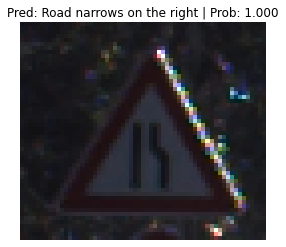

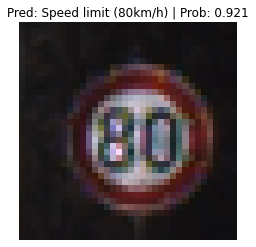

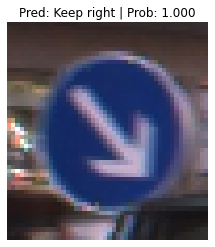

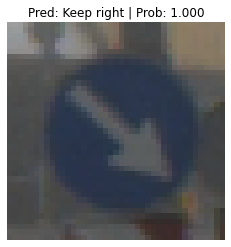

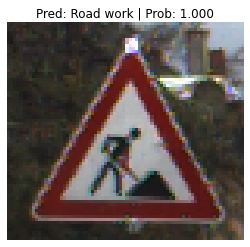

In [110]:
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model, 
                        image_path=image_path,
                        class_names=classes,
                        image_size=(30, 30))